In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('resistividad.csv')
df.head()

,Distancia,Corriente,V_laton,V_hierro,V_cobre
0,13,1.0,1.9,2.7,1.6
1,13,1.4,2.7,4.1,2.3
2,13,1.8,3.7,5.2,2.9
3,13,2.2,4.4,6.5,3.5
4,13,2.6,5.3,7.7,4.0


## Preprocesamiento de datos

In [3]:
df['Distancia'] = df['Distancia']*0.01 # cm a m
#df['Corriente'] = df['Corriente']*0.001 # mv a A

In [4]:
for i in df.columns:
    if 'V' in i:
        df[i] = df[i]*0.001 #pasar de mv a volts

In [5]:
df.head()

,Distancia,Corriente,V_laton,V_hierro,V_cobre
0,0.13,1.0,0.0019,0.0027,0.0016
1,0.13,1.4,0.0027,0.0041,0.0023
2,0.13,1.8,0.0037,0.0052,0.0029
3,0.13,2.2,0.0044,0.0065,0.0035
4,0.13,2.6,0.0053,0.0077,0.0040


In [6]:
# De antemano conocemos los siguientes parámetros
laton_diam = 0.0065
hierro_diam = 0.0066

cobre_diam_ext=0.0065
cobre_diam_int = 0.0046



In [7]:
#son las mismas mediciones para cada tubo
A = np.pi*(laton_diam/2)**2
L = 0.4

In [8]:
A

3.318307240354219e-05

## Análisis

In [9]:
a = "v_cobre"
a[2:]

'cobre'

In [10]:
# R = v/I
corriente = df['Corriente']
for i in df.columns:
    if 'V' in i:
        df[f'R_{i[2:]}'] = df[i]/corriente

In [11]:
df.columns

Index(['Distancia', 'Corriente', 'V_laton', 'V_hierro', 'V_cobre', 'R_laton',
       'R_hierro', 'R_cobre'],
      dtype='object')

$\rho =  \frac{AR}{L}$

In [12]:
rho = pd.DataFrame()

In [13]:
metales = ['laton','cobre','hierro']
distancia = df['Distancia']
for m in metales:
    rho[m] = (A*df[f'R_{m}'])/distancia

In [14]:
distancia

0     0.13
1     0.13
2     0.13
3     0.13
4     0.13
5     0.13
6     0.13
7     0.13
8     0.13
9     0.13
10    0.13
11    0.26
12    0.26
13    0.26
14    0.26
15    0.26
16    0.26
17    0.26
18    0.26
19    0.26
20    0.26
21    0.26
22    0.40
23    0.40
24    0.40
25    0.40
26    0.40
27    0.40
28    0.40
29    0.40
30    0.40
31    0.40
32    0.40
Name: Distancia, dtype: float64

In [15]:
rho

,laton,cobre,hierro
0,4.849834e-07,4.084070e-07,6.891869e-07
1,4.922763e-07,4.193465e-07,7.475308e-07
2,5.246896e-07,4.112432e-07,7.374016e-07
3,5.105088e-07,4.060866e-07,7.541607e-07
4,5.203263e-07,3.926991e-07,7.559457e-07
5,5.105088e-07,3.998986e-07,7.572547e-07
6,5.030013e-07,3.978966e-07,7.432408e-07
7,5.037916e-07,3.895988e-07,7.321771e-07
8,5.105088e-07,4.011141e-07,7.596857e-07
9,5.105088e-07,3.939796e-07,7.435672e-07


In [16]:
rho.mean(axis=0)

laton     2.960323e-07
cobre     2.365126e-07
hierro    5.393723e-07
dtype: float64

In [17]:
A_cobre = A-np.pi*(cobre_diam_int/2)**2

In [18]:
rho['cobre'] = (A_cobre*df['R_cobre'])/distancia

In [19]:
rho.mean(axis=0)

laton     2.960323e-07
cobre     1.180604e-07
hierro    5.393723e-07
dtype: float64

In [20]:
rho.iloc[0,0]*(10**7)

np.float64(4.849833658979243)

In [21]:
df.head()

,Distancia,Corriente,V_laton,V_hierro,V_cobre,R_laton,R_hierro,R_cobre
0,0.13,1.0,0.0019,0.0027,0.0016,0.001900,0.002700,0.001600
1,0.13,1.4,0.0027,0.0041,0.0023,0.001929,0.002929,0.001643
2,0.13,1.8,0.0037,0.0052,0.0029,0.002056,0.002889,0.001611
3,0.13,2.2,0.0044,0.0065,0.0035,0.002000,0.002955,0.001591
4,0.13,2.6,0.0053,0.0077,0.0040,0.002038,0.002962,0.001538


In [26]:
df[df['Distancia']==0.13]

,Distancia,Corriente,V_laton,V_hierro,V_cobre,R_laton,R_hierro,R_cobre
0,0.13,1.0,0.0019,0.0027,0.0016,0.001900,0.002700,0.001600
1,0.13,1.4,0.0027,0.0041,0.0023,0.001929,0.002929,0.001643
2,0.13,1.8,0.0037,0.0052,0.0029,0.002056,0.002889,0.001611
3,0.13,2.2,0.0044,0.0065,0.0035,0.002000,0.002955,0.001591
4,0.13,2.6,0.0053,0.0077,0.0040,0.002038,0.002962,0.001538
5,0.13,3.0,0.0060,0.0089,0.0047,0.002000,0.002967,0.001567
6,0.13,3.4,0.0067,0.0099,0.0053,0.001971,0.002912,0.001559
7,0.13,3.8,0.0075,0.0109,0.0058,0.001974,0.002868,0.001526
8,0.13,4.2,0.0084,0.0125,0.0066,0.002000,0.002976,0.001571
9,0.13,4.6,0.0092,0.0134,0.0071,0.002000,0.002913,0.001543


In [29]:
distancia.unique()

array([0.13, 0.26, 0.4 ])

In [56]:
def PlotCvV(material):
    fig,ax = plt.subplots(figsize=(8,8))
    for d in distancia.unique():
        mask = df[df['Distancia'] == d]

                            
        ax.scatter(mask['Corriente'],mask[f'V_{material}']*1000)
        ax.set_title(f'Corriente vs voltaje ({material})')
        ax.set_xlabel('Corriente (A)')
        ax.set_ylabel('Voltaje (mV)')
        ax.legend( ['0.13m', '0.26m', '0.4m'])

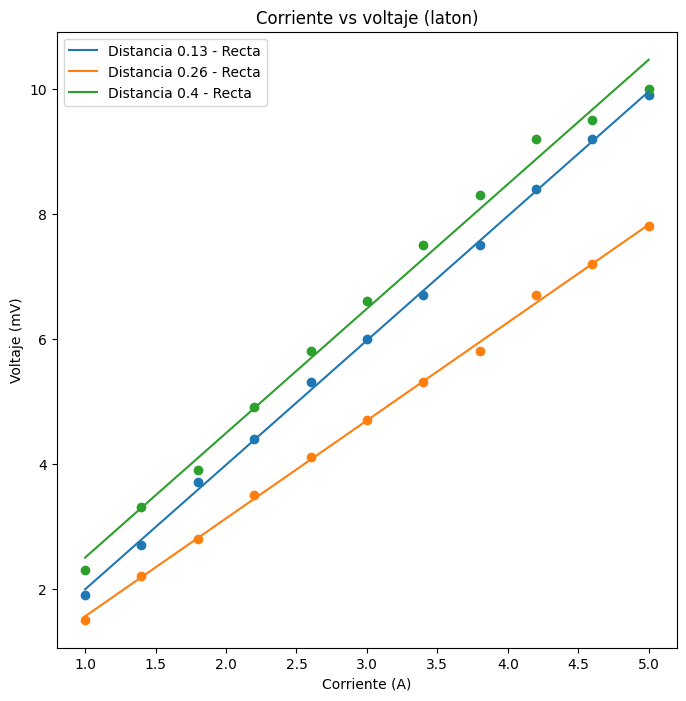

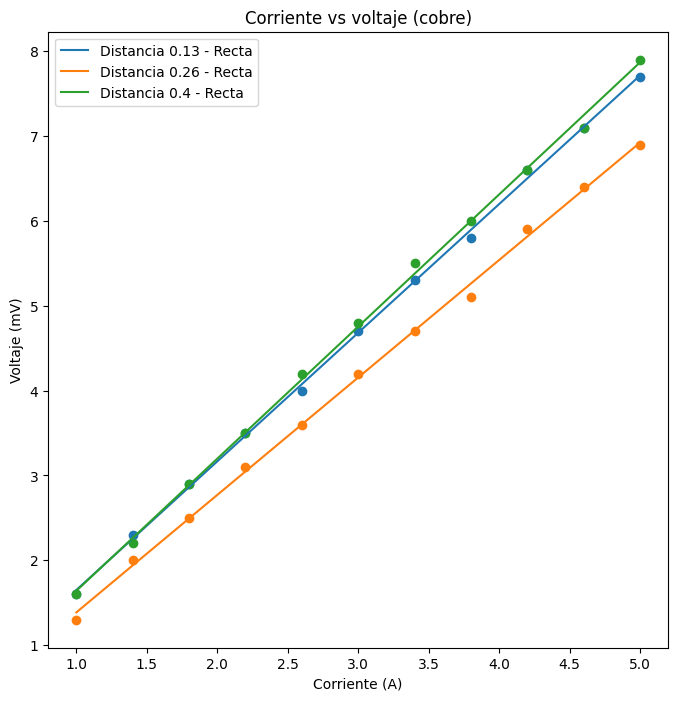

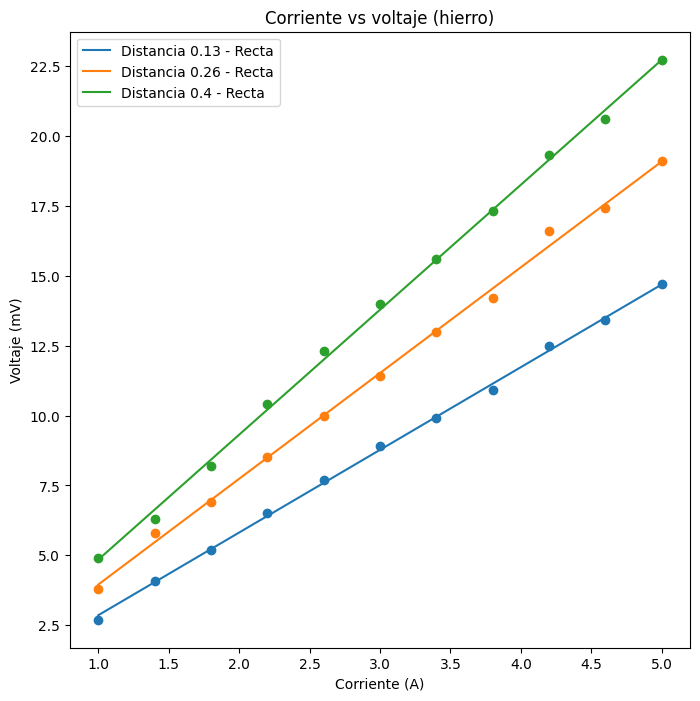

In [59]:
for i in metales:
    PlotCvV(i)

In [58]:
def PlotCvV(material): 
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for d in distancia.unique():
        mask = df[df['Distancia'] == d]

        # Datos para la regresión lineal
        x = mask['Corriente'].values
        y = mask[f'V_{material}'].values * 1000
        
        # Ajuste lineal
        coef = np.polyfit(x, y, 1)  # Grado 1 para regresión lineal
        poly1d_fn = np.poly1d(coef) # Generar la función de la recta
        
        # Graficar datos experimentales
        ax.scatter(x, y)
        
        # Graficar recta de regresión
        ax.plot(x, poly1d_fn(x), label=f'Distancia {d} - Recta')
    
    ax.set_title(f'Corriente vs voltaje ({material})')
    ax.set_xlabel('Corriente (A)')
    ax.set_ylabel('Voltaje (mV)')
    ax.legend()
